In [1]:
from src.config.config import model_4_1_mini as model
from src.config.prompt import prompt as mi_prompt

import os
import openai
from langchain.chains import LLMChain
from src.tools.rag import RAGLocal
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import tools_condition
from pydantic import BaseModel
from langgraph.graph import END



from src.componentes.utils import create_tool_node_with_fallback, route_tools, handle_tool_error,_print_event
from src.componentes.assitant import Assistant
from src.componentes.estado import State
from src.tools.Herramienta_RAG import Herramienta_RAG as raw_tool



from src.tools.rag import RAGLocal

Attempting to load .env file...
OPENAI_API_KEY found in environment. Length: 164, Ends with: ...N9UA
Tracing activo: True
Initializing  OpenAIModels...
 OpenAIModels initialized successfully.


In [2]:
rag = RAGLocal(root_folder="data", index_folder="data/faiss_indexes")
rag.load_index()
Herramienta_RAG = raw_tool.bind(rag=rag)

In [3]:


def initialize_agent():

    try:
        # Define the LLM for the agent
        llm = model #gpt-4.1-2025-04-14 / claude-3-5-sonnet-latest /gpt-4o-2024-08-06 /gpt-4.1-2025-04-14

        # Define the system prompt for the agent using a chat prompt template
        # Build the prompt template
        prompt = mi_prompt


        # Define the tools that the agent can use
        tools = [
            Herramienta_RAG
            ]

        # Bind the tools to the LLM via the prompt
        assistant_runnable = prompt | llm.bind_tools(tools )

        # Build the state graph for the agent
        #Initialize the Agent
        builder = StateGraph(State)
        #Define Nodes
        builder.add_node("assistant", Assistant(assistant_runnable))
        builder.add_node("tools", create_tool_node_with_fallback(tools))

        #Define edges
        builder.add_edge(START, "assistant")
        builder.add_conditional_edges(
            "assistant", route_tools, ["tools", END]
        )
        builder.add_edge("tools", "assistant")




        # Set up the memory checkpointer for the graph
        memory = MemorySaver()
        agent_graph = builder.compile(
            checkpointer=memory,
            # NEW: The graph will always halt before executing the "sensitive_tools" node.
            # The user can approve or reject (or even alter the request) before
            # the assistant continues
            #interrupt_before=["sensitive_tools"],
        )
        return agent_graph
        
    except Exception as e:
        print("Fallo inicializando el agente:", e)
        raise 
agente = initialize_agent()


Fallo inicializando el agente: Unsupported function

bound=StructuredTool(name='Herramienta_RAG', description='Siempre usa esta herramienta Esta herramienta te permite buscar información sobre:\n        redes neuronales\n        deep learning\n        inteligencia artificial\n        machine learning\n        aprendizaje profundo\n        aprendizaje automático\n\n\n    Args:\n        input: el texto para realizar la busqueda en la base de datos vecotrizada\n        k: el número de trozos que recuperamos de la base de datos vectorizada', args_schema=<class 'langchain_core.utils.pydantic.Herramienta_RAG'>, func=<function Herramienta_RAG at 0x00000121DF981FC0>) kwargs={'rag': <src.tools.rag.RAGLocal object at 0x000001219488EF20>} config={} config_factories=[]

Functions must be passed in as Dict, pydantic.BaseModel, or Callable. If they're a dict they must either be in OpenAI function format or valid JSON schema with top-level 'title' and 'description' keys.


ValueError: Unsupported function

bound=StructuredTool(name='Herramienta_RAG', description='Siempre usa esta herramienta Esta herramienta te permite buscar información sobre:\n        redes neuronales\n        deep learning\n        inteligencia artificial\n        machine learning\n        aprendizaje profundo\n        aprendizaje automático\n\n\n    Args:\n        input: el texto para realizar la busqueda en la base de datos vecotrizada\n        k: el número de trozos que recuperamos de la base de datos vectorizada', args_schema=<class 'langchain_core.utils.pydantic.Herramienta_RAG'>, func=<function Herramienta_RAG at 0x00000121DF981FC0>) kwargs={'rag': <src.tools.rag.RAGLocal object at 0x000001219488EF20>} config={} config_factories=[]

Functions must be passed in as Dict, pydantic.BaseModel, or Callable. If they're a dict they must either be in OpenAI function format or valid JSON schema with top-level 'title' and 'description' keys.

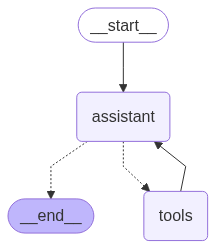

In [ ]:
from IPython.display import Image, display

try:
    display(Image(agente.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
interacciones = [

    "Que es una red neuronal?",

]





config = {
    "configurable": {
        # Checkpoints are accessed by thread_id
        "thread_id": "Prueba xxx",
    }
}


_printed = set()
for interaccion in interacciones:
    events = agente.stream(
        {"messages": ("user", interaccion)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)

AttributeError: 'NoneType' object has no attribute 'stream'